In [51]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [27]:
data1 = pd.read_csv('Price-Range-Phone-Dataset.csv')

In [28]:
data1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [29]:
data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
data = data1.drop(['price_range'], axis = 1)

In [31]:
min_max_Scalar = preprocessing.MinMaxScaler()

In [32]:
col = data.columns
result = min_max_Scalar.fit_transform(data)
data= pd.DataFrame(result, columns=col)

In [33]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [34]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [35]:
data = data.dropna(axis=0,inplace=False)

In [36]:
data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [37]:
y = data1['price_range']
x = data

In [38]:
y.unique()

array([1, 2, 3, 0], dtype=int64)

In [39]:
# Balanced or Unbalanced based on the Price Range
# 1. LOW COST
# 2. MEDIUM COST
# 3. HIGH COST
# 4. VERY HIGH COST

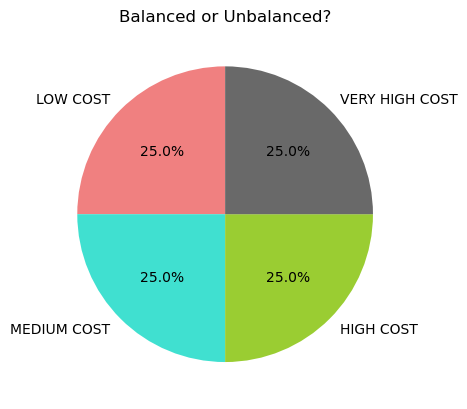

In [40]:
labels = ["LOW COST", "MEDIUM COST", "HIGH COST", "VERY HIGH COST"]
values = data1['price_range'].value_counts().values
colors = ['lightcoral','turquoise','yellowgreen', 'dimgray']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.set_title('Balanced or Unbalanced?')
plt.show()

In [41]:
from numpy.random import RandomState
rng = RandomState()

#Spliting the given data into two parts i.e., Training data and Testing data

train = data.sample(frac=0.9, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

In [42]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
350,0.072144,1.0,1.00,0.0,0.789474,1.0,0.677419,0.222222,0.308333,0.000000,0.80,0.029592,0.502670,0.621325,0.714286,0.611111,0.722222,1.0,0.0,1.0
420,0.637943,1.0,0.00,1.0,0.368421,0.0,0.080645,0.333333,0.208333,0.571429,0.60,0.419898,0.403204,0.355692,0.071429,0.277778,1.000000,1.0,0.0,1.0
1917,0.869071,0.0,0.88,1.0,0.000000,1.0,0.129032,0.555556,0.175000,0.857143,0.45,0.129082,0.060080,0.117584,0.642857,0.388889,0.055556,1.0,1.0,0.0
57,0.324649,0.0,0.32,1.0,0.000000,1.0,0.951613,0.333333,0.225000,0.285714,0.45,0.296429,0.213618,0.990647,0.285714,0.222222,1.000000,1.0,0.0,1.0
1349,0.718103,1.0,0.16,1.0,0.000000,1.0,0.193548,0.333333,0.775000,0.142857,0.20,0.618878,0.591455,0.792090,0.857143,0.111111,0.222222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0.719439,0.0,0.96,0.0,0.421053,0.0,0.016129,0.888889,1.000000,0.000000,1.00,0.174490,0.113485,0.862373,0.857143,0.222222,0.777778,1.0,0.0,0.0
1184,0.543086,1.0,0.68,0.0,0.000000,1.0,0.612903,0.777778,0.300000,0.857143,0.05,0.167347,0.906542,0.742117,0.285714,0.444444,0.833333,1.0,1.0,1.0
1493,0.455578,1.0,0.00,1.0,0.157895,1.0,0.741935,0.000000,0.333333,1.000000,0.60,0.136735,0.340454,0.239444,0.214286,0.166667,0.055556,1.0,0.0,0.0
1417,0.992652,1.0,0.56,0.0,0.000000,0.0,0.774194,0.666667,0.325000,1.000000,0.90,0.489796,0.951268,0.160609,0.500000,0.222222,0.222222,1.0,1.0,0.0


In [43]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
14,0.911824,0.0,0.00,0.0,0.684211,1.0,0.806452,0.666667,0.875000,0.000000,0.85,0.181633,0.042056,0.031267,0.642857,0.500000,0.055556,1.0,0.0,1.0
19,0.120908,1.0,0.00,0.0,0.210526,0.0,0.274194,1.000000,0.341667,0.428571,0.55,0.460204,0.376502,0.556120,0.428571,0.055556,0.888889,0.0,1.0,1.0
26,0.012024,1.0,0.44,1.0,0.368421,1.0,0.790323,0.222222,0.433333,0.428571,0.95,0.280612,0.096796,0.937199,0.785714,0.055556,0.111111,1.0,0.0,1.0
42,0.502338,1.0,0.00,1.0,0.263158,1.0,0.048387,0.111111,0.600000,0.142857,0.95,0.349490,0.142857,0.433458,0.714286,0.000000,0.111111,1.0,1.0,0.0
76,0.409486,0.0,0.92,0.0,0.210526,1.0,0.112903,0.333333,0.975000,0.285714,0.75,0.530612,0.381175,0.173971,0.357143,0.388889,0.833333,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0.856379,0.0,0.96,1.0,0.105263,0.0,0.645161,0.666667,0.200000,0.714286,0.40,0.551531,0.987316,0.035008,0.642857,0.277778,0.055556,0.0,1.0,0.0
1971,0.024716,0.0,0.24,1.0,0.000000,1.0,0.370968,0.222222,0.691667,0.857143,0.35,0.232143,0.024700,0.523517,0.285714,0.166667,0.833333,1.0,1.0,1.0
1989,0.056780,0.0,0.92,0.0,0.105263,0.0,0.209677,0.111111,0.025000,0.285714,0.55,0.122959,0.236315,0.624265,0.500000,0.444444,0.055556,0.0,0.0,0.0
1994,0.238477,0.0,0.68,0.0,0.052632,0.0,0.774194,0.000000,0.033333,0.000000,0.10,0.269388,0.611482,0.994655,0.857143,0.888889,0.055556,1.0,1.0,0.0


In [44]:
train.index

Index([ 350,  420, 1917,   57, 1349,  756,  925, 1334,  452, 1172,
       ...
       1105,  208,  126, 1403,  323,  888, 1184, 1493, 1417, 1743],
      dtype='int64', length=1800)

In [45]:
y_train = y[train.index]

In [46]:
y_test = y[test.index]

In [47]:
y_train

350     1
420     1
1917    0
57      3
1349    3
       ..
888     3
1184    3
1493    0
1417    1
1743    2
Name: price_range, Length: 1800, dtype: int64

In [48]:
y_test

14      0
19      1
26      3
42      1
76      0
       ..
1967    1
1971    1
1989    1
1994    3
1996    2
Name: price_range, Length: 200, dtype: int64

In [49]:
print(train.shape)
print(test.shape)

#Printing the shapes of the Test and Train data

(1800, 20)
(200, 20)


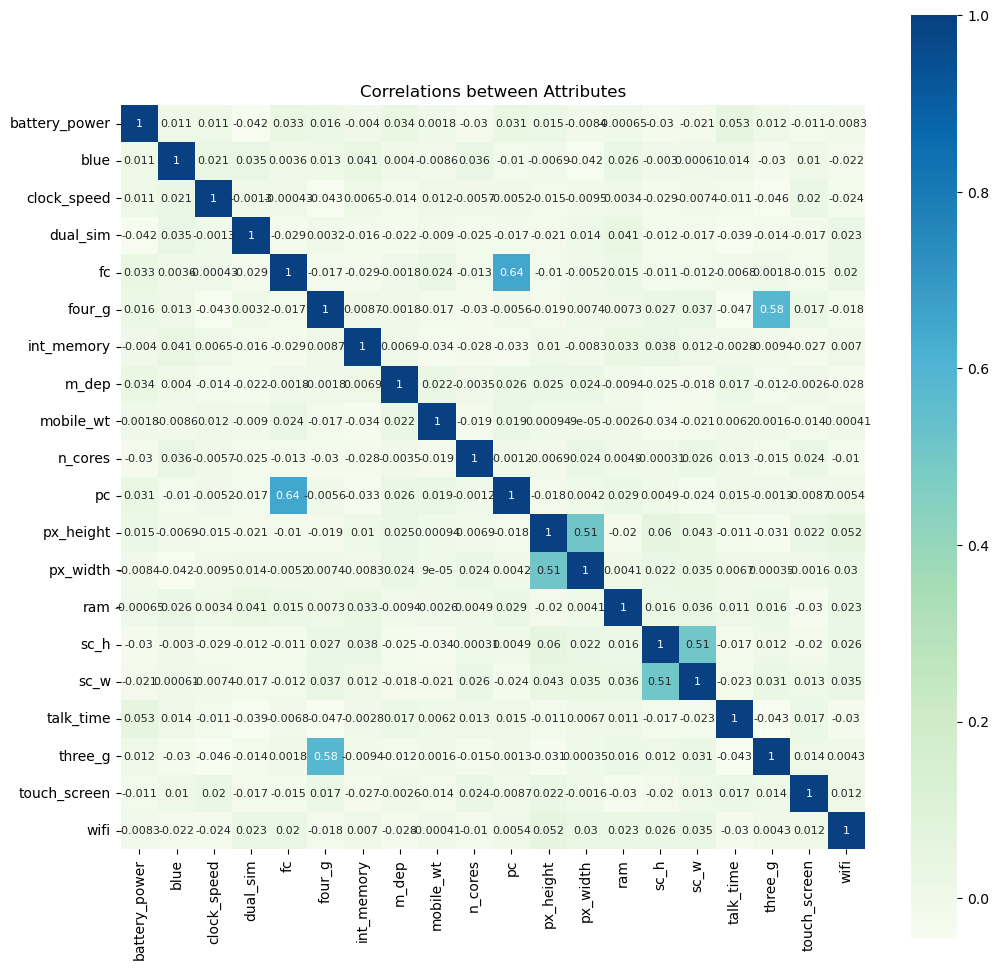

In [50]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

#Plotting the Correlation between the Attributes

In [ ]:
import pickle

filename = 'Price-Range-Phone-Dataset.csv'
pickle.dump(lr,open(filename,'wb'))